In [1]:
# import dependencies
%matplotlib inline

# Data manipulattion
import numpy as np
import pandas as pd

# Data visualisaton?
import matplotlib.pyplot as plt
import seaborn as sns
import missingno


# Preprocessing
from  sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from numpy import nan
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Machine Learning
from sklearn.ensemble import RandomForestClassifier

import os


In [2]:
# Column transformer

"""
Column transformer takes in a list of tuples 

cf = ColumnTransformer([
    ("step_name", transformation(), name of column),
    (),
    ()]
    remainder="drop" or "passthrough"

)

"""

'\nColumn transformer takes in a list of tuples \n\ncf = ColumnTransformer([\n    ("step_name", transformation(), name of column),\n    (),\n    ()]\n    remainder="drop" or "passthrough"\n\n)\n\n'

In [3]:
train = pd.read_csv("Titanic_CSV/train.csv")
test = pd.read_csv("Titanic_CSV/test.csv")

In [4]:
test.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


# Inspection of NULL values

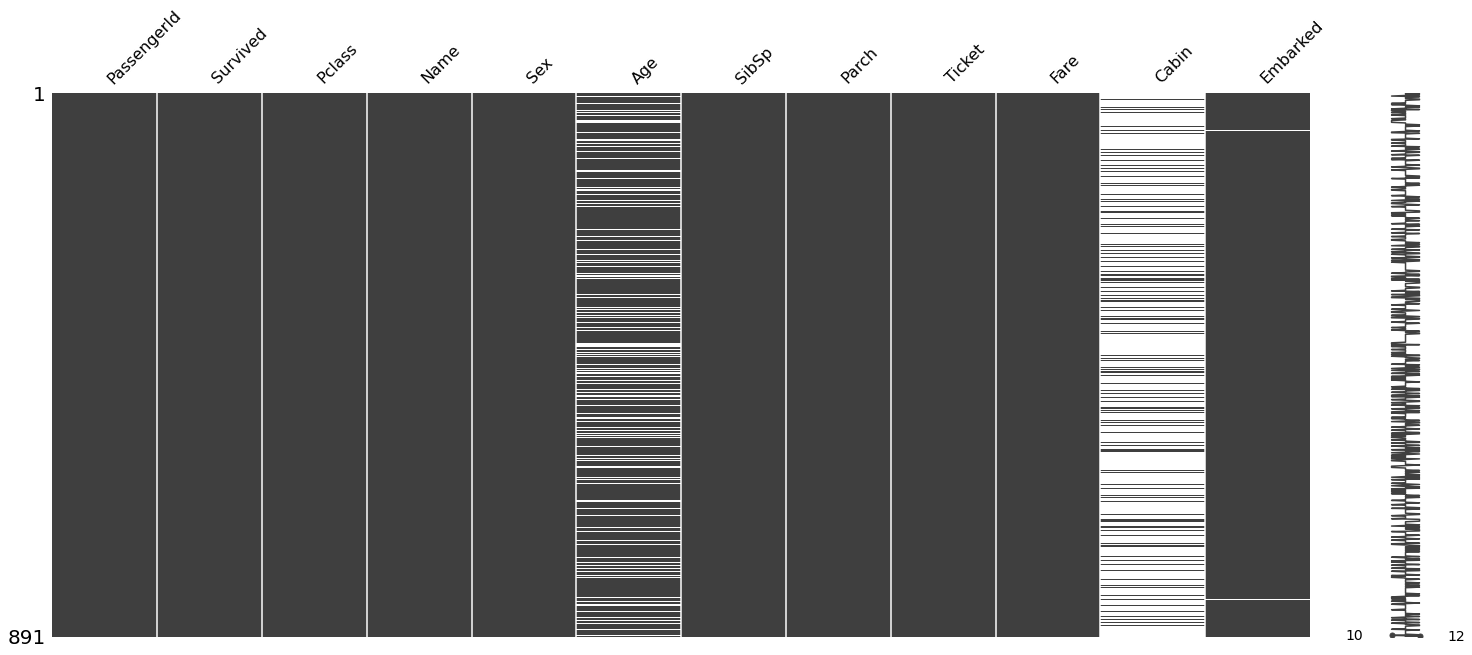

In [5]:
missingno.matrix(train)

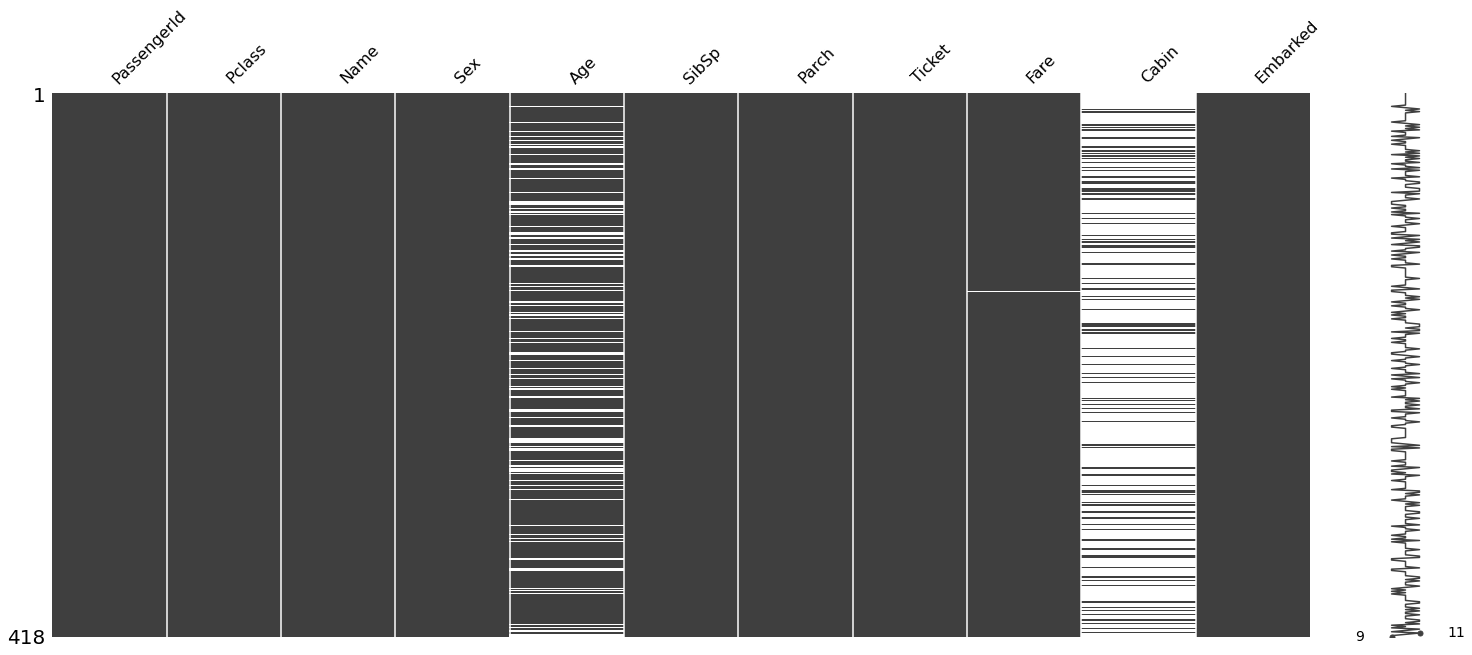

In [6]:
missingno.matrix(test)

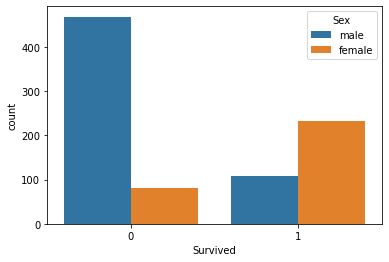

In [7]:
sns.countplot(x=train["Survived"], hue=train["Sex"], data=train)

We see that a large portion of females survived. This will be used as the benchmark score.

# Drop columns that will not be used

Skipping most EDA

In [8]:
train.drop(["Name", "Ticket", "Cabin", "PassengerId"], axis="columns", inplace=True)
test.drop(["Name", "Ticket", "Cabin", "PassengerId"], axis="columns", inplace=True)

In [9]:
y=train["Survived"]
X=train.drop("Survived", axis="columns")

In [10]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In the future, you should first search for rows with missing targets, then drop those rows first.

In [11]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [42]:
train["Sex"].replace(["male", "female"], [1,0]) #code on how to replace 

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [13]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [14]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


# Now we want to perform preprocessing
We want to use pipeline and columntransformer to make the necessary
Numeric: Fill by mean and apply a scaler
Categoric: Inpute most common value and apply onehotencoder
Then, apply the same preprocessing to the test dataset

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [16]:
cat_cols = X.select_dtypes(include="object").columns
cat_cols

Index(['Sex', 'Embarked'], dtype='object')

In [17]:
num_cols = X.select_dtypes(exclude="object").columns
num_cols

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [18]:
# Define the tranformer for categorical values

categorical_transformer = Pipeline([
    ('simple_imputer', SimpleImputer(strategy='constant')),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [19]:
# Define the transformer for numerical values

numerical_transformer = Pipeline([
    ("simple_imputer", SimpleImputer(strategy="mean")),
    ("scaler", MinMaxScaler())
])

In [20]:
# Combine both into one column_transformer

preprocessor = ColumnTransformer([
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)])


In [21]:
# Appending a classifier to a preprocessing pipeline will create a full prediction pipeline

process_and_classify = Pipeline([
    ("preprocessing", preprocessor),
    ("classifier", RandomForestClassifier())
    
],)



In [22]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [23]:
# This can be used to make predictions

process_and_classify.fit(X,y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
               

In [24]:
process_and_classify.predict(test)

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [25]:
process_and_classify.score(X, y)

0.9820426487093153

# First, compare the model performance using train_test_split

Random state left blank to illustrate differing scores
---

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [27]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
845,3,male,42.0,0,0,7.5500,S
175,3,male,18.0,1,1,7.8542,S
568,3,male,NaN,0,0,7.2292,C
663,3,male,36.0,0,0,7.4958,S
844,3,male,17.0,0,0,8.6625,S
...,...,...,...,...,...,...,...
840,3,male,20.0,0,0,7.9250,S
345,2,female,24.0,0,0,13.0000,S
208,3,female,16.0,0,0,7.7500,Q
118,1,male,24.0,0,1,247.5208,C


In [28]:
y_train

845    0
175    0
568    0
663    0
844    0
      ..
840    0
345    1
208    1
118    0
75     0
Name: Survived, Length: 712, dtype: int64

In [29]:
process_and_classify.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
               

In [30]:
process_and_classify.score(X_test, y_test)

0.8268156424581006

# Now with CV

In [31]:
cross_val_score(process_and_classify, X, y, cv=10).mean()

0.8025842696629214

In [32]:
process_and_classify.named_steps["classifier"].feature_importances_

array([7.17441806e-02, 2.56066695e-01, 5.51077332e-02, 3.70047132e-02,
       2.58810521e-01, 1.50394137e-01, 1.39435230e-01, 1.12554861e-02,
       7.85295890e-03, 1.23059652e-02, 2.23802769e-05])

In [33]:
process_and_classify.steps[1][1].feature_importances_

array([7.17441806e-02, 2.56066695e-01, 5.51077332e-02, 3.70047132e-02,
       2.58810521e-01, 1.50394137e-01, 1.39435230e-01, 1.12554861e-02,
       7.85295890e-03, 1.23059652e-02, 2.23802769e-05])

In [34]:
process_and_classify.steps

[('preprocessing',
  ColumnTransformer(transformers=[('num',
                                   Pipeline(steps=[('simple_imputer',
                                                    SimpleImputer()),
                                                   ('scaler', MinMaxScaler())]),
                                   Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                  ('cat',
                                   Pipeline(steps=[('simple_imputer',
                                                    SimpleImputer(strategy='constant')),
                                                   ('one_hot_encoder',
                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                   Index(['Sex', 'Embarked'], dtype='object'))])),
 ('classifier', RandomForestClassifier())]

In [35]:
process_and_classify.named_steps['preprocessing'].transformers_[1][1]\
   .named_steps['one_hot_encoder'].get_feature_names(cat_cols)

array(['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Embarked_missing_value'], dtype=object)

In [36]:
process_and_classify.named_steps["preprocessing"].transformers_

[('num',
  Pipeline(steps=[('simple_imputer', SimpleImputer()),
                  ('scaler', MinMaxScaler())]),
  Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
 ('cat',
  Pipeline(steps=[('simple_imputer', SimpleImputer(strategy='constant')),
                  ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))]),
  Index(['Sex', 'Embarked'], dtype='object'))]

In [37]:
process_and_classify.named_steps["preprocessing"].transformers_[1]

('cat',
 Pipeline(steps=[('simple_imputer', SimpleImputer(strategy='constant')),
                 ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))]),
 Index(['Sex', 'Embarked'], dtype='object'))

In [38]:
process_and_classify.named_steps["preprocessing"].transformers_[1][1]

Pipeline(steps=[('simple_imputer', SimpleImputer(strategy='constant')),
                ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))])

In [39]:

process_and_classify.named_steps["preprocessing"].transformers_[1][1].named_steps["one_hot_encoder"]

OneHotEncoder(handle_unknown='ignore')

In [40]:

process_and_classify.named_steps["preprocessing"].transformers_[1][1].named_steps["one_hot_encoder"].get_feature_names(cat_cols)

array(['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Embarked_missing_value'], dtype=object)

In [41]:
process_and_classify.named_steps["preprocessing"].transformers[0][1].named_steps["simple_imputer"].get_feature_names

AttributeError: 'SimpleImputer' object has no attribute 'get_feature_names'

Not sure how to get all the feature names for comparison with importances

In [ ]:
process_and_classify.get_params()

In [ ]:
param_grid = {
 'classifier__n_estimators': [50, 100, 400, 700, 1000]}

param_grid

In [ ]:
grid_search = GridSearchCV(process_and_classify, param_grid, cv=10)
grid_search.fit(X_train, y_train)
cv_results = pd.DataFrame(grid_search.cv_results_)


In [ ]:
param_grid = {
    'preprocessing__num__simple_imputer__strategy': ['mean', 'median'],
    'classifier__n_estimators':[100, 500, 1000],
    'classifier__criterion': ['gini', "entropy"]
    
}

In [ ]:
grid_search = GridSearchCV(process_and_classify, param_grid, cv=10)
grid_search.fit(X_train, y_train)
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

In [ ]:
grid_search.best_score_

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
# You can call predictions directly from grid_search object as it has been updated with best hyperparameters

grid_search.score(X_test, y_test)


# GridSearchCV was very slow to compute. Next one used RandomisedSearchCV


In any case, submit this random forest model for prediction 

In [ ]:
test

In [ ]:
# Create a data frame with two columns: PassengerId & Survived for the final submission
submission_df = pd.DataFrame()
submission_df["Survived"]=grid_search.predict(test)
submission_df.to_csv("randomforest.csv")

Okay made a mistake. Dropping passengerId is correct but you should not alter the main train and test df because you will need that information. Just for now I will copy paste in excel manually. 

## This one shows how to get gender only benchmark manually

In [ ]:
gender_only_df = pd.DataFrame()
gender_only_df["Survived"] = test["Sex"]
gender_only_df

In [ ]:
gender_only_df.loc[gender_only_df['Survived']=='male', :] = 0
gender_only_df.loc[gender_only_df['Survived']=='female', :]=1

gender_only_df.to_csv("mygender.csv")

# Score: 0.74401

No significant improvement and still worse than the benchmark score.

Do not edit directly on the train and test csv
Use randomsearchcv
Use model tuning across a few models
Do some advanced feature engineering like binning
Confusion matrix
Work with dimensionality reduction


https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html